# Useful functions

In [1]:
import numpy as np
import pandas as pd 
import keras
import os
import re
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing, model_selection
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn import datasets
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist

Using TensorFlow backend.
/home/aurelien/Desktop/CoursFac/Info/TER/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aurelien/Desktop/CoursFac/Info/TER/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aurelien/Desktop/CoursFac/Info/TER/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
def get_goodXy (X,y):
    ynew = model.predict_classes(X)
    X_good =[]
    y_good=[]
    for i in range(len(X)):
        if (ynew[i]==0 and y[i]==1) or (ynew[i]==1 and y[i]==0):
            print ("error prediction for X=%s, Predicted=%s, Real=%s"% (X[i], ynew[i], y[i]))
        else :
            X_good.append(X[i])
            y_good.append(y[i])
    return X_good,y_good        

In [3]:
def get_result_layers(model,X):
    result_layers=[]
    for i in range (len(model.layers)-1):
        hidden_layers= keras.backend.function(
                [model.layers[0].input],   
                [model.layers[i].output,] 
                )    
        result_layers.append(hidden_layers([X_good])[0])  
    return result_layers

In [4]:
def save_result_layers(filename,X,y,result_layers):
    f = open(filename, "w")
    for nb_X in range (len(X)):
        #my_string=""
        my_string=str(y[nb_X])+','
        for nb_layers in range (len(model.layers)-1):
            my_string+="<b>,"
            for j in range (len(result_layers[nb_layers][nb_X])):
                my_string+=str(result_layers[nb_layers][nb_X][j])+','
            my_string+="</b>,"    
        my_string=my_string [0:-1]
        my_string+='\n'
        f.write(my_string)    
    f.close()

## Iris dataset 

In [5]:
url="./iris.csv"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 
         'Species']

data = pd.read_csv(url, names=names)

#Classification binaire sur Virginica et Setosa seulement
data=data[data['Species'].isin(['Iris-virginica', 'Iris-setosa'])]

i = 8
data_to_predict = data[:i].reset_index(drop = True) 
"""
reset_index() is a method to reset index of a Data Frame. 
reset_index() method sets a list of integer ranging from 0 to length of data as index. 
"""
predict_species = data_to_predict.Species 
""" Species de la class Iris """

predict_species = np.array(predict_species) 
"""
An array object satisfying the specified requirements.
https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html
"""

prediction = np.array(data_to_predict.drop(['Species'],axis= 1))

data = data[i:].reset_index(drop = True)

X = data.drop(['Species'], axis = 1) 
"""
The drop() function is used to drop specified labels from rows or columns.
"""
X = np.array(X)
y = data['Species']

encoder = LabelEncoder()
y=encoder.fit_transform(y)


train_X, test_X, train_y, test_y = model_selection.train_test_split(X,y,test_size = 0.1, random_state = 0) 

In [6]:
# Utilisation de keras comme classifieur
# mettre sigmoid comme fonction car binaire. Attention 1 seul neurone en sortie
input_dim = len(data.columns) - 1
model = Sequential()
model.add(Dense(8, input_dim = input_dim , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_X, train_y, epochs = 10, batch_size = 2)

scores = model.evaluate(test_X, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
82/82 [==============================] - 0s 4ms/step - loss: 0.6311 - acc: 0.5610
Epoch 2/10
82/82 [==============================] - 0s 798us/step - loss: 0.4775 - acc: 0.5610
Epoch 3/10
82/82 [==============================] - 0s 860us/step - loss: 0.3983 - acc: 0.6341
Epoch 4/10
82/82 [==============================] - 0s 950us/step - loss: 0.3329 - acc: 0.9878
Epoch 5/10
82/82 [==============================] - 0s 780us/step - loss: 0.2698 - acc: 1.0000
Epoch 6/10
82/82 [==============================] - 0s 831us/step - loss: 0.2142 - acc: 1.0000
Epoch 7/10
82/82 [==============================] - 0s 805us/step - loss: 0.1677 - acc: 1.0000
Epoch 8/10
82/82 [==============================] - 0s 674us/step - loss: 0.1352 - acc: 1.0000
Epoch 9/10
82/82 [==============================] - 0s 797us/step - loss: 0.1049 - acc: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step

acc: 100.00%


In [7]:
# Récupération seulement des bons classés
X_good,y_good=get_goodXy (train_X, train_y)

In [8]:
# Récupération des valeurs de tous les layers sauf le dernier
result_layers=get_result_layers(model,X_good)

In [9]:
# Sauvegarde du fichier
# structure :
# 0/1 = valeur de la classe
# chaque valeur de layer est entourée par un []
save_result_layers("iris_8_10_8_tmp",X_good,y_good,result_layers)
# tri du fichier
os.system ('sort iris_8_10_8_tmp > iris_8_10_8_.csv')
# effacer le fichier intermédiaire
os.system ('rm iris_8_10_8_tmp')

0

In [10]:
def get_directory_layers_from_csv(filename):
    tokens=filename.split("_")
    df = pd.read_csv(filename, sep = ',', header = None) 

    
    # creation d'un répertoire pour sauver tous les fichiers
    repertoire=filename[0:-4]
    os.makedirs(repertoire, exist_ok=True)
    string = repertoire+'/'+tokens[0]+'_'
    f=[]
    filenames=[]
    for nb_tokens in range (1,len(tokens)-1):
        name_file=string+'l'+str(nb_tokens)+'_'+tokens[nb_tokens]+'.csv'
        f.append(open(name_file, "w"))
        filenames.append(name_file)
        
        
    # sauvegarde du dataframe dans une chaîne de caracteres
    ch = df.to_string(header=False,
                  index=False,
                  index_names=False).split('\n')
    vals = [','.join(ele.split()) for ele in ch]
    
    # sauvegarde dans des fichiers spécifiques par layer
    token_layer=[]
    token_exemples=[]
    for nb_exemples in range (len(vals)):
        deb=str(df[0][nb_exemples])+','
        # 1 ligne correspond à une chaine
        s=vals[nb_exemples]
        listoftokens=re.findall(r'<b>,(.+?),</b>', s)
        nb_layers=len(listoftokens)
        
        for nb_token in range (nb_layers):
            save_token=''
            save_token=deb+str(listoftokens[nb_token])+'\n'
            
            f[nb_token].write(save_token)

    # sauvegarde d'un fichier qui contient tous les layers en une fois
    # récupération des données pour enlever les <b> et </b>
    df_all=pd.DataFrame()
    myindex=0
    for nb_columns in range(df.shape[1]):
        df[nb_columns]=df[nb_columns].astype(str)
        if (df[nb_columns]!='<b>').all() and (df[nb_columns]!='</b>').all():
            df_all[myindex]=df[nb_columns]
            myindex+=1

    # construction du nom du fichier de sauvegarde
    string = repertoire+'/'+tokens[0]+'_'
    for nb_tokens in range (1,len(tokens)-1):
        string+='l'+str(nb_tokens)+'_'+tokens[nb_tokens]+'_'
    string+='.csv'       
    # sauvegarde en .csv
    df_all.to_csv(string, sep=',', encoding='utf-8',index=False)

In [11]:
#Create a directory with a specific file for all the layers
filename="iris_8_10_8_.csv"    
get_directory_layers_from_csv(filename)   

In [12]:
from sklearn.decomposition import PCA
from numpy import ndarray
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
import math

def plot_clusters_3D (X,y_predict, nb_clusters, pca_done=False):
    if pca_done==False:
        pca = PCA(n_components=3) 
        pca.fit(X) 
        pca_data = pd.DataFrame(pca.transform(X))
    else: pca_data = pd.DataFrame(X)
    colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
    # number of steps to taken generate n(clusters) colors
    skips = math.floor(len(colors[5 : -5])/nb_clusters) 
    cluster_colors = colors[5 : -5 : skips] 
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection = '3d') 
    ax.scatter(pca_data[0], pca_data[1], pca_data[2],
           c = list(map(lambda label : cluster_colors[label], 
                                            y_predict))) 

    str_labels = list(map(lambda label:'% s' % label, y_predict)) 

    list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 

    plt.show()
    
def plot_clusters_2D (X,y_predict, nb_clusters, pca_done=False):
    if pca_done==False:
        pca = PCA(n_components=2) 
        X_r = pca.fit(X).transform(X)
    else: X_r = X
    data = pd.DataFrame(X_r, columns=['x','y'])
    data['label']=y_predict
    list_clusters=list(set(y_predict))
    print (list_clusters)
    #create a new figure
    plt.figure(figsize=(5,5))

    #loop through labels and plot each cluster
    for i, label in enumerate(list_clusters):

        #add data points 
        plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=color[i], 
                alpha=0.20)

        #add label
        plt.annotate(label, 
                 data.loc[data['label']==label,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color=color[i])
        
def get_directory_layers_from_csv(filename):
    tokens=filename.split("_")
    df = pd.read_csv(filename, sep = ',', header = None) 

    
    # creation d'un répertoire pour sauver tous les fichiers
    repertoire=filename[0:-4]
    os.makedirs(repertoire, exist_ok=True)
    string = repertoire+'/'+tokens[0]+'_'
    f=[]
    filenames=[]
    for nb_tokens in range (1,len(tokens)-1):
        name_file=string+'l'+str(nb_tokens)+'_'+tokens[nb_tokens]+'.csv'
        f.append(open(name_file, "w"))
        filenames.append(name_file)
        
        
    # sauvegarde du dataframe dans une chaîne de caracteres
    ch = df.to_string(header=False,
                  index=False,
                  index_names=False).split('\n')
    vals = [','.join(ele.split()) for ele in ch]
    
    # sauvegarde dans des fichiers spécifiques par layer
    token_layer=[]
    token_exemples=[]
    for nb_exemples in range (len(vals)):
        deb=str(df[0][nb_exemples])+','
        # 1 ligne correspond à une chaine
        s=vals[nb_exemples]
        listoftokens=re.findall(r'<b>,(.+?),</b>', s)
        nb_layers=len(listoftokens)
        
        for nb_token in range (nb_layers):
            save_token=''
            save_token=deb+str(listoftokens[nb_token])+'\n'
            
            f[nb_token].write(save_token)

    # sauvegarde d'un fichier qui contient tous les layers en une fois
    # récupération des données pour enlever les <b> et </b>
    df_all=pd.DataFrame()
    myindex=0
    for nb_columns in range(df.shape[1]):
        df[nb_columns]=df[nb_columns].astype(str)
        if (df[nb_columns]!='<b>').all() and (df[nb_columns]!='</b>').all():
            df_all[myindex]=df[nb_columns]
            myindex+=1

    # construction du nom du fichier de sauvegarde
    string = repertoire+'/'+tokens[0]+'_'
    for nb_tokens in range (1,len(tokens)-1):
        string+='l'+str(nb_tokens)+'_'+tokens[nb_tokens]+'_'
    string+='.csv'       
    # sauvegarde en .csv
    df_all.to_csv(string, sep=',', encoding='utf-8',index=False)

In [13]:
#Create a directory with a specific file for all the layers
filename="iris_8_10_8_.csv"    
get_directory_layers_from_csv(filename)

In [14]:
def get_result_cluster(clusters,numLayer,cluster_class):

    idClusters=np.unique(clusters)
    tabCount={}
    for id in idClusters:
        count = 0
        for j in range(len(clusters)):
            if clusters[j]==id:
                tabCount[id]=count+1
                count+=1
    print(tabCount)
    my_string=""
    for key,value in tabCount.items():
        my_string += str(numLayer)+','+str(cluster_class)+','
        my_string+=str(value)+','+str(key)+'\n'
    
    return my_string

def save_result_cluster(filename,C1,C2,C3):
    f = open(filename, "w")
    
    f.write("Layer,Class,Count,Cluster\n")
    f.write(str(C1))
    f.write(str(C2))
    f.write(str(C3))
    
    f.close()

def clusterizeLayer(url, nbClusters=4):
    data = pd.read_csv(url,names=names)
    dataC1=[]
    dataC2=[]
    indexC2=0
    indexC1=0
    i=0 
    for index, row in data.iterrows():
        
        #print('oui: \n',index[0])
        if index[0]==0:
            dataC1.append(row)
            indexC1=i
        if index[0]==1:
            dataC2.append(row)
            indexC2=i
        i+=1
        
#     with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#         print(data)

    algo = KMeans(n_clusters = nbClusters)
    #fit_predict fait tourner l'algo et retourne y où y[i] est l'indice du cluster auquel dataC12[i] appartient
    clustersC1C2 = algo.fit_predict(data)
    clustersC1=[]
    clustersC2=[]
#     print("i1: \n",indexC1,"\n i2: \n",indexC2)
    for i in range(len(clustersC1C2)):
        if i<indexC1:
            clustersC1.append(clustersC1C2[i])
        else:
            clustersC2.append(clustersC1C2[i])
#     print("CC1  : \n",clustersC1)
#     print("CC2  : \n",clustersC2)
#     print("CC1-2  : \n",clustersC1C2)

    dataC3=pd.read_csv('iris.csv',names=names)
    dataC3=dataC3[dataC3['Species'].isin(['Iris-versicolor'])]
    dataC3['Species']=1.0

#     print("print dataC3:\n")
#     print(dataC3)

    #predict utilise les clusters calculés par fit_predict(dataC1C2) et attribue chaque ligne de dataC3 au cluster dont le centre
    #minimise la distance
    C3ClusterPred = algo.predict(dataC3)

#     print("Clusters C3:\n")
#     print(C3ClusterPred)
#     print("Clusters C1C2 :\n")
#     print(clustersC1C2)
    return (C3ClusterPred,clustersC1,clustersC2)#,clustersC1,clustersC2#)

In [15]:
clustersC3l1,clustersC1l1,clustersC2l1=clusterizeLayer('./iris_8_10_8_/iris_l1_8.csv')
clustersC3l2,clustersC1l2,clustersC2l2=clusterizeLayer('./iris_8_10_8_/iris_l2_10.csv')
clustersC3l3,clustersC1l3,clustersC2l3=clusterizeLayer('./iris_8_10_8_/iris_l3_8.csv')

C1l1=get_result_cluster(clustersC1l1,1,1)
C1l2=get_result_cluster(clustersC1l2,2,1)
C1l3=get_result_cluster(clustersC1l3,3,1)

C2l1=get_result_cluster(clustersC2l1,1,2)
C2l2=get_result_cluster(clustersC2l2,2,2)
C2l3=get_result_cluster(clustersC2l3,3,2)

C3l1=get_result_cluster(clustersC3l1,1,3)
C3l2=get_result_cluster(clustersC3l2,2,3)
C3l3=get_result_cluster(clustersC3l3,3,3)

save_result_cluster("./iris_8_10_8_/iris_clusters_layer1.csv",C1l1,C2l1,C3l1)
save_result_cluster("./iris_8_10_8_/iris_clusters_layer2.csv",C1l2,C2l2,C3l2)
save_result_cluster("./iris_8_10_8_/iris_clusters_layer3.csv",C1l3,C2l3,C3l3)


{1: 35}
{0: 35}
{0: 21, 2: 14}
{0: 8, 1: 1, 2: 12, 3: 26}
{0: 1, 1: 26, 2: 12, 3: 8}
{1: 24, 2: 1, 3: 22}
{1: 50}
{0: 27, 2: 23}
{0: 21, 2: 29}


In [16]:
def graphCluster(layer,title):
    names = ['cluster0c1', 'cluster0c2', 'cluster0c3' ,
             'cluster1c1', 'cluster1c2', 'cluster1c3' , 
             'cluster2c1', 'cluster2c2', 'cluster2c3',
             'cluster3c1', 'cluster3c2', 'cluster3c3']

    cluster0 = [0,0,0]
    cluster1 = [0,0,0]
    cluster2 = [0,0,0]
    cluster3 = [0,0,0]

    for index,element in layer.iterrows():
        if element["Cluster"]==0:
            cluster0[element["Class"] - 1]=element["Count"]
        if element["Cluster"]==1:
            cluster1[element["Class"]-1]=element["Count"]
        if element["Cluster"]==2:
            cluster2[element["Class"]-1]=element["Count"]
        if element["Cluster"]==3:
            cluster3[element["Class"]-1]=element["Count"]


    plt.figure(figsize=(20, 10))
    values = cluster0 + cluster1 + cluster2 +cluster3 
#     print(cluster0)
#     print(cluster1)
#     print(cluster2)
#     print(cluster3)

    colors = {'Classe 1':'#f91212', 'Classe 2':'#FFAA00', 'Classe 3':'#0055FF'}
    labels = list(colors.keys())
    handles = [plt.bar(names,values,color=colors[label],width=1) for label in labels]
    plt.legend(handles, labels)
    plt.bar(names,values,color = list(colors.values()),width=1)
    plt.title(title)

layer1:
    Layer  Class  Count  Cluster
0      1      1     35        1
1      1      2      8        0
2      1      2      1        1
3      1      2     12        2
4      1      2     26        3
5      1      3     50        1


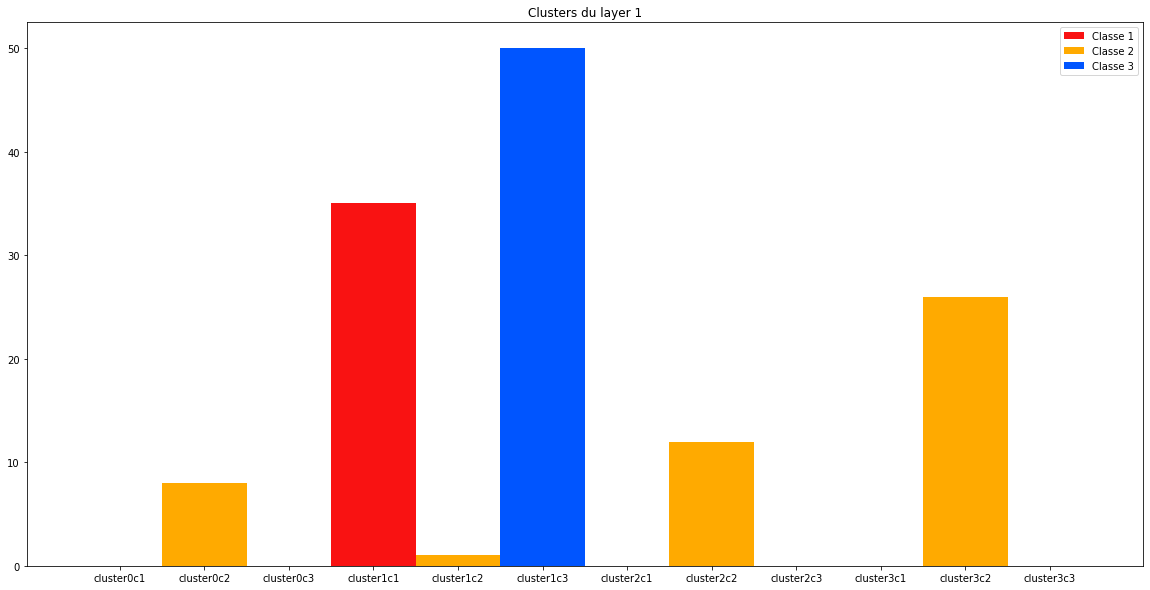

In [18]:
layer1 = pd.read_csv("./iris_8_10_8_/iris_clusters_layer1.csv")
print("layer1:\n",layer1)
graphCluster(layer1,'Clusters du layer 1')

layer1:
    Layer  Class  Count  Cluster
0      2      1     35        0
1      2      2      1        0
2      2      2     26        1
3      2      2     12        2
4      2      2      8        3
5      2      3     27        0
6      2      3     23        2


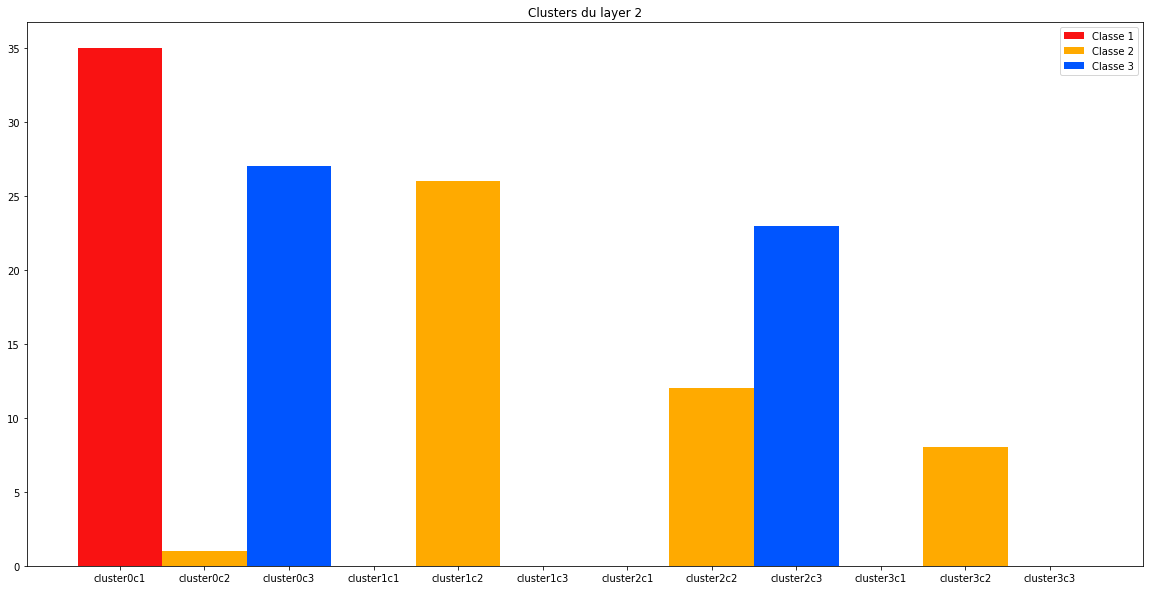

In [19]:
layer2 = pd.read_csv("./iris_8_10_8_/iris_clusters_layer2.csv")
print("layer1:\n",layer2)
graphCluster(layer2,'Clusters du layer 2')

layer1:
    Layer  Class  Count  Cluster
0      3      1     21        0
1      3      1     14        2
2      3      2     24        1
3      3      2      1        2
4      3      2     22        3
5      3      3     21        0
6      3      3     29        2


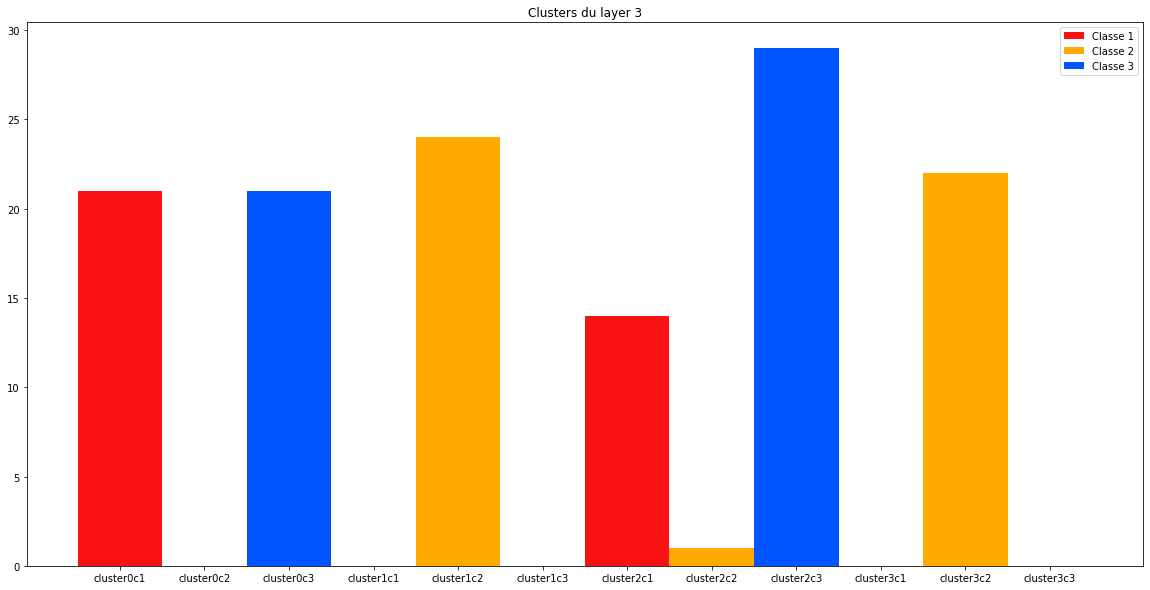

In [21]:
layer3 = pd.read_csv("./iris_8_10_8_/iris_clusters_layer3.csv")
print("layer1:\n",layer3)
graphCluster(layer3,'Clusters du layer 3')

## MNIST Dataset

In [ ]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
from numpy import load

data = load('mnist.npz')
lst = data.files
print(lst)

(X_train,y_train) = (data[lst[1]],data[lst[2]])
(X_test,y_test) = (data[lst[0]],data[lst[3]])

X_train_sample=X_train[0:100]
y_train_sample=y_train[0:100]

X_train=X_train_sample
y_train=y_train_sample
X_train = X_train.reshape(100, 784)
X_train = X_train.astype('float32')

X_train /= 255

X_01=[]
y_01=[]
nb_X=0
for i in range(X_train.shape[0]):
    if (y_train[i]==0 or y_train[i]==1):
        
        nb_X+=1
        X_01.append(X_train[i])
        y_01.append(y_train[i])

       
train_X=np.asarray(X_01)

train_y=y_01

encoder = LabelEncoder()
train_y=encoder.fit_transform(train_y)

In [ ]:
input_dim = 784

model = Sequential()
model.add(Dense(512, input_dim = input_dim , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_X, train_y, epochs = 40, batch_size = 32)


X_good,y_good=get_goodXy (train_X, train_y)


# Récupération des valeurs de tous les layers sauf le dernier
result_layers=get_result_layers(model,X_good)

In [ ]:
# Sauvegarde du fichier
# structure :
# 0/1 = valeur de la classe
# chaque valeur de layer est entourée par une étoile *
save_result_layers("mnist_512_tmp",X_good,y_good,result_layers)
# tri du fichier
os.system ('sort mnist_512_tmp > mnist_512_.csv')
# effacer le fichier intermédiaire
os.system ('rm mnist_512_tmp')

In [ ]:
normalise = True
includeClasses = True
nbClusters = 10

data = load('mnist.npz')
lst = data.files

print(data[lst[0]][0]) #X_test
print(data[lst[1]][0]) #X_train
print(data[lst[2]][0]) #y_train
print(data[lst[3]][0]) #y_test


"""
#On rajoute une colonne Classe qui contient le numéro de la classe correspondant au feature Species
listeSpecies = pd.unique(data['Species'])
listeIndices = [i+1 for i in range(len(listeSpecies))]
dico = dict(zip(listeSpecies, listeIndices))
data.insert(len(data.columns), 'Classe', [dico[x] for x in data['Species']])

if normalise:
    if includeClasses:
        m = data.columns[data.columns!='Species']
    else:
        #On veut garder la séparation en classes 1, 2 et 3, on exclut donc cette colonne de la normalisation
        m = data.columns[~data.columns.isin(['Species','Classe'])]
    data[m] = (data[m]-data[m].min())/(data[m].max()-data[m].min())

#Note: dataC3 et dataC1C2 sont des copies profondes
dataC1C2 = data[data['Species'].isin(['Iris-virginica','Iris-setosa'])].drop('Species', axis=1)
dataC3 = data[data['Species']=='Iris-versicolor'].drop('Species', axis=1)


algo = KMeans(n_clusters = nbClusters)
#fit_predict fait tourner l'algo et retourne y où y[i] est l'indice du cluster auquel dataC12[i] appartient
clustersC1C2 = algo.fit_predict(dataC1C2)

#predict utilise les clusters calculés par fit_predict(dataC12) et attribue chaque ligne de dataC3 au cluster dont le centre
#minimise la distance
C3ClusterPred = algo.predict(dataC3)

#Les Species sont-elles bien discrimninées par l'algo de clustering?
clusters = [[] for _ in range(1+max(clustersC1C2))]
for i,x in enumerate(clustersC1C2):
    clusters[x].append(i)
taillesClusters = [len(l) for l in clusters]
print("Tailles des clusters non vides")
print(taillesClusters)

for cluster in clusters:
    if not(cluster):
        continue
    classe = data.at[cluster[0],'Species']
    for sign in cluster:
        if data.at[sign, 'Species'] != classe:
            print("Présence classe mixte")

#Predict sur la classe 3
X = dataC3.drop(columns= ['Classe'])
X = np.array(X)
Y = model.predict(X)
def sigmoid(x):
    return 1/(1 + np.exp(-x))
Y = sigmoid(Y)
print(Y)
"""